# Sistemas Lineares

Um dos problemas mais clássicos em computação científica é a resolução de sistemas lineares. Isso se dá por pelo menos dois motivos:

1. Sabemos resolvê-los bem. Ou seja, temos confiança que conseguimos resolver com alta precisão e de forma eficiente sistemas lineares com um número enorme de variáveis.

1. Outros problemas importantes podem ser reduzidos à solução de um ou mais sistemas lineares (potencialmente grandes, potencialmente infinitos).

Por isso vamos estudá-los durante as próximas aulas. Vamos começar estabelecendo um pouco de notação e recordando o que já sabemos sobre a solução de sistemas lineares.

Lembramos inicialmente que qualquer sistema linear de $n$ variáveis e $n$ incógnitas pode ser descrito em forma matricial. Ou seja, podemos descrever o problema de resolução de sistemas por uma equação.
\begin{equation*}
Ax = b,
\end{equation*}
em que $A$ é uma matriz de $\mathbb{R}^{n \times n}$ e $b$ um vetor do $\mathbb{R}^n$. É claro que também é possível usar o mesmo tipo de notação para sistemas com números diferentes entre variáveis e incógnitas e nesse caso a matriz deixa de ser quadrada.

Uma primeira pergunta natural é: Quão fácil é resolver um sistema? A resposta para isso não é única. Pensando em um sistema geral, com centenas de variáveis por exemplo, ficamos com a impressão que é muito difícil. Mas se a matriz $A$ tiver estrutura especial, pode ser que a resolução do sistema seja fácil. Dois exemplos são:

* $A$ é a identidade. Nesse caso o solução é trivial $x = b$.
* $A$ é diagonal (todos os elementos fora da diagonal principal de $A$ são nulos). Mais uma vez a solução do sistema também é fácil, basta definir $x_i = b_i / a_{ii},\ i = 1, \ldots, n$, considerando que todos os elementos da diagonal são não nulos.
   
## Sistemas triangulares
   
Outro caso interessante ocorre quando $A$ é triangular inferior, ou superior, com todos os elementos da diagonal não nulos. Nesse caso podemos resolver o sistema por substituição. Vejamos um exemplo triangular superior.

\begin{equation*}
\left\{
\begin{array}{lclclcll}
a_{11}x_1 &+& a_{12}x_2 &+& a_{13}x_3 &+& a_{14}x_4 &= b_1 \\
          & & a_{22}x_2 &+& a_{23}x_3 &+& a_{24}x_4 &= b_2 \\
          & &           & & a_{33}x_3 &+& a_{34}x_4 &= b_3 \\
          & &           & &           & & a_{44}x_4 &= b_4. 
\end{array}
\right.
\end{equation*}

Nesse caso é fácil achar o valor de $x_4$ usando a última equação. Susbtituindo o valor encontrado na penúltima equação passa a ser fácil encontrar encontrar o valor de $x_3$ e a assim por diante. Obtemos:

\begin{align*}
x_4 &= b_4 / a_{44} \\
x_3 &= (b_3 - a_{34} x_4)/a_{33} \\
x_2 &= (b_2 - a_{23} x_3 - a_{24} x_4)/a_{22} \\
x_1 &= (b_1 - a_{12}x_2 - a_{13} x_3 - a_{14} x_4)/a_{11}. \\
\end{align*}

Isso pode ser facilmente generalizado para o caso de mais variáveis. Chegamos à fórmula
\begin{equation}
x_i = \frac{b_i - \sum_{j = i + 1}^n a_{ij} x_j}{a_{ii}},\ i = 1, \ldots, n.
\end{equation}

Agora, o curso de Cálculo Numérico não é apenas um curso de Matemática, então para nós não basta deduzir as fórmulas, temos que pensar um pouco como implementá-las. Vamos então apresentar uma rotina simples que resolve um sistema por (retro) substituição.

In [1]:
# Funcao para resolver sistema triangular superior por retro substituicao
function retro_substituicao(A, b)
    n = length(b)
    x = Array(Float64, n)
    x[n] = b[n]/A[n, n]
    for i = n - 1:-1:1
        # Note que abaixo usamos a notacao de Julia e outras linguagens
        # que permite manipular múltiplos elementos de um vetor ou
        # matriz por vez.
        x[i] = (b[i] - dot(A[i, i + 1:end], x[i + 1:end]))/A[i, i]
    end
    return x
end

# Dados para teste
A = [1.0 2 3; 0 3 7; 0 0 7]
b = [1.0, 4, 3.2]

# Resolve o sistema
sol = retro_substituicao(A, b)
println("Solucao obtida é ", sol)

# Verifica a resposta
println("A*sol, deveria ser igual a b: ", A*sol, b)

Solucao obtida é [-0.734762,0.266667,0.776143]
A*sol, deveria ser igual a b: [1.0,4.0,3.6][1.0,4.0,3.2]


Um exercício interessante é escrever a versão do código para resolução de sistemas que são triangulares inferiores. Nesse caso a variável da solução que pode ser obtida imediatamente é $x_1$ e não mais $x_n$. A partir dela se obtém $x_2$ continuando até $x_n$. Que tal fazer isso na caixa de programa abaixo?


In [2]:
# Tente implementar e testar uma rotina de substituicao para frente 
# (para sistemas triangulares inferiores) aqui e faca alguns testes.


## Sistemas gerais

Agora o que fazer quando nos deparamos com um sistema geral como abaixo?

\begin{equation}
\left\{
\begin{array}{lclclcll}
2x_1 &+& 3x_2 &+& x_3  &+& x_4  &= 3 \\
4x_1 &+& 7x_2 &+& 4x_3 &+& 3x_4 &= 6 \\
4x_1 &+& 7x_2 &+& 6x_3 &+& 4x_4 &= 4 \\
6x_1 &+& 9x_2 &+& 9x_3 &+& 8x_4 &= 3.
\end{array}
\right.
\end{equation}

Uma abordagem para isso, que é ensinada no ensino médio, é a ideia de *escalonamento*. Busca-se introduzir zeros nos coeficientes da primeira coluna das equações 2 em diante (para baixo). Depois transformamos em zeros os coeficientes da segunda coluna da equação 3 para frente e assim sucessivamente. O objetivo, é claro, é obter um sistema triangular equivalente ao sistema original. Para isso precisamos introduzir os zeros usando operações que preservem as soluções do sistema original. Isso pode ser feito usando-se operações elementares.

### Operações elementares

1. Multiplicar uma equação por um escalar não nulo.
1. Trocar duas equações de lugar.
1. Somar/Subtrair uma equação a outra.

Por exemplo, podemos introduzir um zero no primeiro coeficiente da segunda equação multiplicando a primeira linha por $-2$ e somando o resultado a segunda. Obteríamos então o sistema:
\begin{equation}
\left\{
\begin{array}{lclclcll}
2x_1 &+& 3x_2 &+& x_3  &+& x_4  &= 3 \\
     &+&  x_2 &+& 2x_3 &+& x_4  &= 0 \\
4x_1 &+& 7x_2 &+& 6x_3 &+& 4x_4 &= 4 \\
6x_1 &+& 9x_2 &+& 9x_3 &+& 8x_4 &= 3.
\end{array}
\right.
\end{equation}

Outro fato interessante, que pode nos aproximar de uma implementação, é que as variáveis aparecem acima apenas por comodidade ou costume. A única informação que é realmente importante são os coeficientes e o lado direito. Isso sugere mais uma vez usar uma representação matricial do sistema. O sistema original poderia então ser representado por:
\begin{equation}
\left[
\begin{array}{llll|l}
2 & 3 & 1 & 1 & 3 \\
4 & 7 & 4 & 3 & 6 \\
4 & 7 & 6 & 4 & 4 \\
6 & 9 & 9 & 8 & 3.
\end{array}
\right].
\end{equation}

Já o sistema transformado, após colocar um zero na posição $(2, 1)$ seria
\begin{equation}
\left[
\begin{array}{llll|l}
2 & 3 & 1 & 1 & 3 \\
0 & 1 & 2 & 1 & 0 \\
4 & 7 & 6 & 4 & 4 \\
6 & 9 & 9 & 8 & 3.
\end{array}
\right].
\end{equation}

É claro que podemos colocar zeros também nas posições 3 e 4 da primeira coluna. Para isso basta somar à terceira linha mais uma vez $-2$ vezes a primeira. O coeficiente usado na multiplicação nada mais é do que o negativo valor da posição que se quer zerar divido pelo elemento que está na posição $1 \times 1$. Já para colocar um zero na posição $(4, 1)$ devemos somar à quarta $-3$ vezes a primeira. Mais uma vez o coeficiente $-3$ usado é obtido através da divisão entre o negativo do número que está na posição que deve ser eliminada dividido pelo número que está em $(1, 1)$. Vamos fazer isso, mas usando Julia. 

In [3]:
# Dados do sistema

A = [2.0 3 1 1; 0 1 2 1; 4 7 6 4; 6 9 9 8]
b = [3.0, 0, 4, 3]
b = reshape(b, 4, 1)
println("Sistema")
sistema = [A b]

Sistema


4×5 Array{Float64,2}:
 2.0  3.0  1.0  1.0  3.0
 0.0  1.0  2.0  1.0  0.0
 4.0  7.0  6.0  4.0  4.0
 6.0  9.0  9.0  8.0  3.0

In [4]:
# Introduzindo zero na posicao (3, 1)

sistema[3, :] = sistema[3, :] - sistema[3,1]/sistema[1,1]*sistema[1, :]
println("Sistema")
sistema

Sistema


4×5 Array{Float64,2}:
 2.0  3.0  1.0  1.0   3.0
 0.0  1.0  2.0  1.0   0.0
 0.0  1.0  4.0  2.0  -2.0
 6.0  9.0  9.0  8.0   3.0

In [5]:
# Introduzindo zero na posicao (4, 1)

sistema[4, :] = sistema[4, :] - sistema[4, 1]/sistema[1,1]*sistema[1, :]
println("Sistema:")
sistema

Sistema:


4×5 Array{Float64,2}:
 2.0  3.0  1.0  1.0   3.0
 0.0  1.0  2.0  1.0   0.0
 0.0  1.0  4.0  2.0  -2.0
 0.0  0.0  6.0  5.0  -6.0

Assim, ao terminarmos de colocar zeros na primeira coluna abaixo da posição $(1, 1)$, obtemos
\begin{equation}
\left[
\begin{array}{rrrr|r}
2 & 3 & 1 & 1 & 3 \\
0 & 1 & 2 & 1 & 0 \\
0 & 1 & 4 & 2 & -2 \\
0 & 0 & 6 & 5 & -6
\end{array}
\right].
\end{equation}

O próximo passo para se obter um sistema triangular é colocar zeros abaixo da posição $(2, 2)$. Isso pode ser obtido somando à terceira linha o inverso da segunda. Por sorte, o elemento na posição $(4, 2)$ já é zero e não precisa ser modificado. Fazemos então:

In [6]:
# Introduzindo zero na posicao (3, 2)

sistema[3,:] = sistema[3, :] - sistema[3, 2]/sistema[2, 2]*sistema[2, :]
println("Sistema:")
sistema

Sistema:


4×5 Array{Float64,2}:
 2.0  3.0  1.0  1.0   3.0
 0.0  1.0  2.0  1.0   0.0
 0.0  0.0  2.0  1.0  -2.0
 0.0  0.0  6.0  5.0  -6.0

Terminamos o processo introduzindo um zero na posição $(4, 3)$ usando um múltiplo da linha $3$.

In [7]:
# Introduzindo zero na posicao (4, 3)

sistema[4, :] = sistema[4, :] - sistema[4, 3]/sistema[3, 3]*sistema[3, :]
println("Sistema:")
sistema

Sistema:


4×5 Array{Float64,2}:
 2.0  3.0  1.0  1.0   3.0
 0.0  1.0  2.0  1.0   0.0
 0.0  0.0  2.0  1.0  -2.0
 0.0  0.0  0.0  2.0   0.0

Ao final temos o sistema
\begin{equation}
\left[
\begin{array}{rrrr|r}
2 & 3 & 1 & 1 & 3 \\
0 & 1 & 2 & 1 & 0 \\
0 & 0 & 2 & 1 & -2 \\
0 & 0 & 0 & 2 & 0
\end{array}
\right].
\end{equation}
Ou usando a notação mais usual
\begin{equation}
\left\{
\begin{array}{rcrcrcrcl}
2x_1 & + & 3x_2 & + & 1x_3 & + & 1x_4 & = & 3 \\
     & + & 1x_2 & + & 2x_3 & + & 1x_4 & = & 0 \\
     &   &      &   & 2x_3 & + & 1x_4 & = & -2 \\
     &   &      &   &      &   & 2x_4 & = & 0.
\end{array}
\right.
\end{equation}
O sistema triangular superior que está pronto para ser resolvido por retro-substituição, apresentada acima. É claro que podemos escrever um programa em Julia que faz tudo de uma vez, pegando um sistema original e devolvendo a versão escalonada.


In [8]:
# Escalonamento em Julia
function escalonamento(A, b)
    n = length(b)
    sistema = [copy(A) reshape(copy(b), n, 1)]
    # Coloca zeros abaixo da posicao i x i usando a linha i
    for i = 1:n - 1
        coefs = sistema[i + 1:end, i]/sistema[i, i]
        sistema[i + 1:end, i] = 0.0
        sistema[i + 1:end, i + 1:end] -= coefs * sistema[i, i + 1:end]'
    end
    return sistema
end

A = [2.0 3 1 1; 4 7 4 3; 4 7 6 4; 6 9 9 8]
b = [3.0, 6, 4, 3]
print("Sistema escalonado:")
escalonamento(A, b)

Sistema escalonado:

4×5 Array{Float64,2}:
 2.0  3.0  1.0  1.0   3.0
 0.0  1.0  2.0  1.0   0.0
 0.0  0.0  2.0  1.0  -2.0
 0.0  0.0  0.0  2.0   0.0

Veja que o sistema obtido ao final é examente o desejado.

O código acima exige alguns comentários para explicar o que ocorre no laço `for`. A primeira linha dentro do `for` calcula os coeficientes que serão usados para multiplicar pela linha `i` (e depois somar nas debaixo). É interessante porque podemos calcular todos de uma vez. A segunda linha coloca zeros abaixo da posição `(i, i)`. Já sabemos que esses zeros vão aparecer lá, pois foi com esse objetivo que definimos os coeficientes. A última linha atualiza a matriz. Para entendê-la temos que entender como Julia interpreta um vetor `*` um vetor transposto. Julia faz o mais natural em Matemática que é considerar o vetor como uma matriz composta de uma única coluna e multiplica essa matriz pela de uma única linha gerada pelo vetor transposto. Com isso Julia gera uma matriz que tem dimensões iguais a número de elementos do primeiro vetor vezes o número de elementos do segundo vetor. A matriz resultante tem cada linha formada pela multiplicações do respectivo coeficiente pelo vetor transposto, que é exatamente o que queremos somar no sistema original. Veja o exemplo abaixo para isso ficar mais claro. Isso em Matemática é conhecido como um *produto externo*.

In [9]:
M = collect(1:9)


9-element Array{Int64,1}:
 1
 2
 3
 4
 5
 6
 7
 8
 9

In [10]:
coefs = collect(1:5)

5-element Array{Int64,1}:
 1
 2
 3
 4
 5

In [11]:
coefs * M'

5×9 Array{Int64,2}:
 1   2   3   4   5   6   7   8   9
 2   4   6   8  10  12  14  16  18
 3   6   9  12  15  18  21  24  27
 4   8  12  16  20  24  28  32  36
 5  10  15  20  25  30  35  40  45

## Fatoração LU

Se $A$ é uma matriz, uma *fatoração* de $A$ é um produto de outras matrizes, geralmente mais simples, que resulta em $A$. Isso é análogo ao caso de números inteiros que são fatorados em números primos.

Um fato interessante sobre o processo de escalonamento é que ele encontra, implicitamente, uma fatoração especial de $A$. Se organizarmos as contas de escalonamento podemos mostrar que ela encontra uma matriz triangular inferior $L$ e outra superior $U$ tal que
$$
A = LU.
$$

Para vermos que isso é verdade vamos analisar como representar cada operação realizada pelo escalonamento através de produtos de matrizes. Com esse objetivo vamos pensar o que ocorre quando multiplicamos uma matriz $A$ à esquerda por uma outra matriz que é igual à identidade a menos de uma posição fora da diagonal. Por exemplo
$$
\left( \begin{array}{rrrr}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
-2 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{array} \right)
\left( \begin{array}{rrrr}
2 & 3 & 1 & 1 \\
4 & 7 & 4 & 3 \\
4 & 7 & 6 & 4 \\
6 & 9 & 9 & 8
\end{array} \right).
$$
Trabalhando um pouco nesse exemplo você verá que a matriz resultante é igual a matriz da direita com a terceira linha trocada pela linha que estava lá menos 2 vezes a primeira linha, ou seja
$$
\left( \begin{array}{rrrr}
2 & 3 & 1 & 1 \\
4 & 7 & 4 & 3 \\
0 & 1 & 4 & 2 \\
6 & 9 & 9 & 8
\end{array} \right).
$$
De uma maneira geral, de multiplicarmos uma matriz $A$ à esquerda por uma matriz igual à identidade a menos de um elemento $c$ na posição $(i, j)$, obteremos uma matriz igual com a linha $i$ trocada por ela mesma somada a $c$ vezes a linha $j$. Esse é exatamente o tipo de operação usada pelo escalonamento. Ela pode ser interpretada como uma sequência de operações elementares do tipo multiplicar uma linha por um número não nulo e trocar uma linha por ela mesma mais outra. Logo o processo de escalonamento pode ser representada por multiplicações por matrizes. Por exemplo, para preencher com zeros a primeira coluna da matriz original acima, começando pela posição $(2, 1)$ até a posição $(4, 1)$ bastaria considerar os seguintes produtos por matrizes (leia da direita para a esquerda para entender mais facilmente).
$$
\underbrace{
\left( \begin{array}{rrrr}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
-3 & 0 & 0 & 1
\end{array} \right)}_{L_{41}}
\underbrace{
\left( \begin{array}{rrrr}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
-2 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{array} \right)}_{L_{31}}
\underbrace{
\left( \begin{array}{rrrr}
1 & 0 & 0 & 0 \\
-2 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{array} \right)}_{L_{21}}
\underbrace{
\left( \begin{array}{rrrr}
2 & 3 & 1 & 1 \\
4 & 7 & 4 & 3 \\
4 & 7 & 6 & 4 \\
6 & 9 & 9 & 8
\end{array} \right)}_{A} = 
\left( \begin{array}{rrrr}
2 & 3 & 1 & 1 \\
0 & 1 & 2 & 1 \\
0 & 1 & 4 & 2 \\
0 & 0 & 6 & 5
\end{array} \right).
$$
A notacão $L_{ij}$ representa matriz que coloca zero na posição $(i, j)$. De fato vamos verificar isso computacionalmente.

In [12]:
A = [2 3 1 1; 4 7 4 3; 4 7 6 4; 6 9 9 8]
L21 = eye(4, 4)
L21[2, 1] = -2
L31 = eye(4, 4)
L31[3, 1] = -2
L41 = eye(4, 4)
L41[4, 1] = -3

L41*(L31*(L21*A))

4×4 Array{Float64,2}:
 2.0  3.0  1.0  1.0
 0.0  1.0  2.0  1.0
 0.0  1.0  4.0  2.0
 0.0  0.0  6.0  5.0

Compare o resultado obtido com o resultado do processo de escalonamento depois de colocar zeros abaixo do primeiro elemento da diagonal acima. Veja que a matriz de partida é a mesma. Outro fato interessante sobre as matrizes $L_1,\ L_2,\ L_3$ acima é que o seu produto é particularmente simples.
$$
\underbrace{
\left( \begin{array}{rrrr|r}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
-3 & 0 & 0 & 1
\end{array} \right)}_{L_{41}}
\underbrace{
\left( \begin{array}{rrrr|r}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
-2 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{array} \right)}_{L_{31}}
\underbrace{
\left( \begin{array}{rrrr|r}
1 & 0 & 0 & 0 \\
-2 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{array} \right)}_{L_{21}} =
\underbrace{
\left( \begin{array}{rrrr|r}
1 & 0 & 0 & 0 \\
-2 & 1 & 0 & 0 \\
-2 & 0 & 1 & 0 \\
-3 & 0 & 0 & 1
\end{array} \right)}_{L_1}.
$$



Basta copiar abaixo da primeira diagonal da identidade os coeficientes que aparecem nas três matrizes na sua posição natural, formando assim a matriz que zera os elementos desejados da coluna $1$. Vamos chamar essa matriz de $L_1$. Para entender o porque isso acontece basta interpretar o produto da direita para a esquerda. Podemos mais uma vez confirmar isso computacionalmente. 

In [13]:
L1 = L41*L31*L21

4×4 Array{Float64,2}:
  1.0  0.0  0.0  0.0
 -2.0  1.0  0.0  0.0
 -2.0  0.0  1.0  0.0
 -3.0  0.0  0.0  1.0

Outro fato interessante sobre as matrizes que se combinam para formar $L_1$ é que suas inversas são fáceis de calcular. Basta inverter o elemento de fora da diagonal. Por exemplo
$$
L_{31}^{-1} = 
\left( \begin{array}{rrrr|r}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
2 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{array} \right).
$$
Confirmando:

In [14]:
L31menos1 = eye(4, 4)
L31menos1[3, 1] = 2

L31menos1*L31

4×4 Array{Float64,2}:
 1.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0
 0.0  0.0  1.0  0.0
 0.0  0.0  0.0  1.0

Isso pode ser entendido porque essa mudança de sinal desfaz a operação elementar representa por essas matrizes. Pense um pouco. 

Agora lembrando que o inverso de um produto é o produto invertido das inversas termos
$$
L_1^{-1} = (L_{41} L_{31} L_{21})^{-1} =  L_{21}^{-1} L_{31}^{-1} L_{41}^{-1} = 
\left( \begin{array}{rrrr|r}
1 & 0 & 0 & 0 \\
2 & 1 & 0 & 0 \\
2 & 0 & 1 & 0 \\
3 & 0 & 0 & 1
\end{array} \right).
$$
De novo ocorre o fenômeno que é simples multiplicar essas matrizes, basta copiar os elementos adequados nas respostas.

O restante do processo de escalonamento também pode continuar sendo representado por multiplicação por matrizes desse tipo. Continuamos o processo colocando zeros abaixo do segundo elemento da diagonal e por fim abaixo do terceiro. O processo todo seria então representado pelo produto.
$$
\underbrace{
\underbrace{
\left( \begin{array}{rrrr}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & -3 & 1
\end{array} \right)}_{L_{43}}
}_{L_3}
\underbrace{
\underbrace{
\left( \begin{array}{rrrr}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{array} \right)}_{L_{42}}
\underbrace{
\left( \begin{array}{rrrr}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & -1 & 1 & 0 \\
0 & 0 & 0 & 1
\end{array} \right)}_{L_{32}}
}_{L_2}
L_1
\underbrace{
\left( \begin{array}{rrrr}
2 & 3 & 1 & 1 \\
4 & 7 & 4 & 3 \\
4 & 7 & 6 & 4 \\
6 & 9 & 9 & 8
\end{array} \right)}_{A} = 
\left( \begin{array}{rrrr}
2 & 3 & 1 & 1 \\
0 & 1 & 2 & 1 \\
0 & 0 & 2 & 1 \\
0 & 0 & 0 & 2
\end{array} \right).
$$


In [15]:
L2 = eye(4, 4)
L2[3, 2] = -1
L2[4, 2] = 0
L3 = eye(4, 4)
L3[4, 3] = -3

(L3*(L2*(L1*A)))

4×4 Array{Float64,2}:
 2.0  3.0  1.0  1.0
 0.0  1.0  2.0  1.0
 0.0  0.0  2.0  1.0
 0.0  0.0  0.0  2.0

Agora, vamos partir dessa última equação. Temos
$$
L_3 L_2 L_1 A = U,
$$
em que $U$ é a matriz triangular superior que obtemos ao final do processo de escalonamento. Podemos então passar o produto das matrizes $L_k$ para o outro lado, usando suas inversas, que sabemos como calcular. Obtendo:
$$
A = L_1^{-1} L_2^{-1} L_3^{-1} U.
$$
Mais uma vez há um "golpe de sorte" e o produto $L_1^{-1} L_2^{-1} L_3^{-1}$ também tem uma expressão particularmente simples, bastando copiar os elementos que aparecem abaixo das diagonais de cada uma dessa matrizes na resposta. Isso ocorre porque o produto $L_{k}^{-1} \dots L_{n - 1}^{-1}$ é composto por matrizes que têm zeros abaixo da diagonal na coluna $k - 1$, já que nessas posições sempre houve $0$ nas linhas que já foram combinadas. Agora quando se multiplica essa matriz intermediária à esquerda por $L_{k-1}$ na coluna $k - 1$ apenas os elementos de $L_{k - 1}$ que estão estão abaixo da diagonal na coluna $k - 1$ irão importar, sendo diretamente copiados. Faça uns exemplos manualmente para se convencer disso. Já a confirmação numérica podemos fazer agora.

In [16]:
inv(L3*L2*L1)

4×4 Array{Float64,2}:
 1.0  0.0  0.0  0.0
 2.0  1.0  0.0  0.0
 2.0  1.0  1.0  0.0
 3.0  0.0  3.0  1.0

De fato a inversa obtida também é uma matriz triangular inferior com os elementos das matrizes inversas copiados. A essa matriz $L_1^{-1} L_2^{-1} \ldots L_{n - 1}^{-1}$ vamos chamar de matriz $L$. Dessa forma obtermos justamente a expressão desejada:
$$
A = LU.
$$
Não podemos deixar de observar que talvez fosse mais natural nomear a matriz $L_1^{-1} L_2^{-1} \ldots L_{n - 1}^{-1}$ de $L^{-1}$. Isso não é feito para evitar uma notação pesada na importante igualdade $A = LU$. 

Deste modo fica natural adaptar o código de escalonamento para calcular a fatoração LU de uma matriz. Para isso basta guardar os coeficientes usados, com sinal adequado, na matriz $L$. A matriz $U$ é a matriz triangular superior final.

In [17]:
# Fatoracao LU de uma matriz A sem pivoteamento
function preLU(A)
    # Reserva espaco para a resposta
    n = size(A)[1]
    L = eye(n)
    U = copy(A)
    # Coloca zeros abaixo da posicao i x i usando a linha i
    for i = 1:n - 1
        coefs = U[i + 1:end, i] / U[i, i]
        L[i + 1:end, i] = coefs
        U[i + 1:end, i] = 0.0
        U[i + 1:end, i + 1:end] -= coefs * U[i, i + 1:end]'
    end
    return L, U
end

A = [2.0 3 1 1; 4 7 4 3; 4 7 6 4; 6 9 9 8]
b = [3.0, 6, 4, 3]
L, U = preLU(A);

In [18]:
L

4×4 Array{Float64,2}:
 1.0  0.0  0.0  0.0
 2.0  1.0  0.0  0.0
 2.0  1.0  1.0  0.0
 3.0  0.0  3.0  1.0

In [19]:
U

4×4 Array{Float64,2}:
 2.0  3.0  1.0  1.0
 0.0  1.0  2.0  1.0
 0.0  0.0  2.0  1.0
 0.0  0.0  0.0  2.0

In [20]:
L*U

4×4 Array{Float64,2}:
 2.0  3.0  1.0  1.0
 4.0  7.0  4.0  3.0
 4.0  7.0  6.0  4.0
 6.0  9.0  9.0  8.0

Vejam que de fato $LU$ é igual à matriz $A$ original. Na verdade, essa igualdade absoluta é obtida nesse caso por que todas as contas, apesar de serem feitas com ponto flutante, geraram números inteiros que podem ser representados. De uma forma geral esperamos que o resultado final sejam aproximadamente a $L$ e a $U$ desejadas. Voltaremos a discutir erros depois.

## Utilizando a fatoração LU para resolver sistemas

Começamos essa discussão falando sobre a solução de sistemas lineares mas fizemos um desvio acima para comentar sobre uma fatoração de matrizes. Vamos agora voltar a trilha original, vendo como usar a fatoração LU para resolver um sistema linear. Desejamos encontrar $x$ tal que
$$
Ax = b.
$$
Isso é equivalente a buscar $x$ tal que
$$
LUx = b.
$$
Como lidar com sistemas que tem produtos de matrizes como acima? Uma ideia é criar variáveis intermediárias, resolvendo o sistema da esquerda para a direita. Por exemplo, no caso acima podemos inicialmente buscar $y$ tal que
$$
L y = b.
$$
Isso é fácil de calcular porque o sistema é triangular inferior. Depois disso resolvemos
$$
U x = y.
$$
Assim, obtemos o $x$ desejado, solução do sistema original. Note que de novo basta resolver um sistema triangular, mas agora superior. De fato colocando as duas últimas expressões juntas temos
$$
U x = y \implies L (U x) = b \implies Ax = b.
$$
A primeira implicação usa a definição de $y$. Mais uma vez, podemos ver isso funcionando usando o código que já desenvolvemos até aqui. 

In [21]:
# Alem da rotina de retro substituicao para a resolucao de sistemas
# triangulares superiores precisamos de uma outra que faca a resolucao
# de sistemas triangulares inferiores. Isso tinha ficado como exercicio
# antes e agora voces podem ver uma resposta.
function substituicao(A, b)
    n = length(b)
    x = Array(Float64, n)
    x[1] = b[1]/A[1, 1]
    for i = 2:n
        x[i] = (b[i] - dot(A[i, 1:i], x[1:i]))/A[i, i]
    end
    return x
end

# Por fim, usamos as rotinas implementadas até agora para resolver um 
# sistema linear.
A = [2.0 3 1 1; 4 7 4 3; 4 7 6 4; 6 9 9 8]
b = [3.0, 6, 4, 3]
L, U = preLU(A)
y = substituicao(L, b)
x = retro_substituicao(U, y)
println("Solucao = ", x)
println("Verificacao, Ax = ", A*x)

Solucao = [-1.0,2.0,-1.0,0.0]
Verificacao, Ax = [3.0,6.0,4.0,3.0]


Um fato que pode ser importante em alguns casos é que uma vez calculada a fatoração LU de uma matriz ela pode ser utilizada sempre no lugar de $A$. Assim, por exemplo, se quisermos resolver sistemas lineares com diferentes lados direitos (diferentes vetores $b$) a fatoração pode ser feita uma única vez.

## Tempo de execução (complexidade)

Ao escrevermos programas de computador é importante que tenhamos uma ideia do seu tempo de execução. Muitas vezes não basta inventar um algoritmo que esteja correto, é preciso que ele seja eficiente. Isso é um pouco menos importante nos dias de hoje do que era há algumas décadas, já que os computadores estão muito mais poderosos. Mas ainda é fácil escrever programas que demoram demais para realizar as suas tarefas.

Quando falamos em programas numéricos, cujo principal objetivo é realizar longas sequencias de cálculos, podemos buscar adquirir uma ideia do tempo de execução ou complexidade de um algoritmo através da contagem do número de operações de ponto flutuantes realizadas. Isso é apenas uma aproximação da complexidade total do processo, já que outras operações que não envolvem cálculos com números reais não são contadas. Isso pode ser particularmente dramático por desprezar a movimentação de dados entre a memória e o processador, algo que é muito demorado em computadores modernos. A contagem do número de operações continua sendo usada, porém, porque geralmente uma implementação cuidadosa de um método numérico é tipicamente limitada por essas operações. 

Usaremos a sigla FLOP (de *Foating Point OPeration*) para designar uma operação básica de ponto flutuante como a soma, subtração, multiplicação, divisão ou extração de raiz quadrada. Nosso objetivo nessa seção é contar a quantidade de FLOPs de cada um dos principais algoritmos implementados até agora.

### Substituição

Vamos começar pela `retro_substituicao`. Olhando o seu código, vemos que a maior parte do trabalho ocorre dentro do laço `for`. Para calcular o novo `x[i]` precisamos executar uma subtração, uma divisão e o produto interno `dot(A[i, i + 1:end], x[i + 1:end])` entre dois vetores de $n - (i + 1) + 1 = n - i$ elementos. Esse produto interno precisa então de $n - i$ produtos de números reais e $n - i - 1$ somas. O total de operações realizadas nessa linha é então $2 + (n - i) + (n - i - 1) = 2(n - i)+ 1$. Dessa forma, podemos calcular o trabalho total:
$$
\sum_{i = 1}^{n} 2(n - i)+ 1 =  \sum_{i = 1}^{n} (2n + 1) - 2 \sum_{i = 1}^{n} i = n(2n + 1) - n(n + 1) = n^2.
$$
Obs: vejam que usei o $i$ variando de $1$ até $n$, isso foi feito para contar também a primeira operação feita, para calcular o `x[n]` que está fora do laço.

Vejam que o tempo é bem razoável, afinal uma matriz triangular tem cerca de $n^2 / 2$ entradas não nulas, então fazemos cerca de duas operações de ponto flutuante (FLOPs) por entrada da matriz. É difícil imaginar algo muito melhor do que isso.

Por fim, como o algoritmo de `substituicao` (para frente) é apenas uma versão invertida da `retro_substituicao`, o número de operações será o mesmo. Faça os detalhes como exercício.

### Fatoração LU

Agora vamos para algo mais desafiador. Vamos tentar avaliar o tempo gasto na rotina `preLU`. De novo ela tem um único laço. Na primeira linha desse laço são executadas $n - 1$ divisões para calcular os coeficientes. Depois na quarta linha fazemos primeiro o produto externo de dois vetores (n - 1) o que precisa de $(n - i)^2$ produtos. Por fim atualizamos a matriz $U$ com $(n - i)^2$ subtrações, totalizado
$$
2(n - i)^2 + (n - i)
$$
FLOPs. Note que a segunda e terceira linha do laço não geram FLOPs, são realizadas apenas cópias de valores em memória. Estamos prontos para escrever a somatória que irá acumular todo o trabalho feito.
$$
\sum_{i = 1}^{n - 1} 2(n - i)^2 + (n - i) = [2(n - 1)^2 + (n - 1)] + [2(n - 2)^2 + (n - 2)] + \ldots + [2\cdot2^2 + 2] + [2\cdot1^2 + 1]. 
$$
Note que lendo essa somatória de trás para frente chegamos a uma expressão um pouco mais simples.
$$
\sum_{i = 1}^{n - 1} 2i^2 + i.
$$

Aqui nos deparamos com uma dificuldade. Como calcular a soma $\sum_{i = 1}^n i^2$? Isso tem uma resposta conhecida que é
$$
\sum_{i = 1}^n i^2 = \frac{n (n + 1) (2n + 1)}{6}.
$$
Você pode encontrar várias demonstrações disso. Um exemplo legal é [essa](http://blog.jgc.org/2008/01/proof-that-sum-of-squares-of-first-n.html). Mas há várias outras demonstrações.

Retornando ao nosso problema queremos
\begin{align*}
    \sum_{i = 1}^{n - 1} 2i^2 + i & = \frac{(n-1)n(2n - 1)}{3} + \frac{(n-1)n}{2} \\
    &= (n-1)n \left(\frac{2n - 1}{3} + \frac{1}{2} \right) \\
    &= (n - 1)n \left( \frac{2n}{3} + \frac{1}{6} \right) \\
    &= \frac{2n^3}{3} - \frac{n^2}{2} - \frac{n}{6} \\
    &\approx \frac{2n^3}{3}.
\end{align*}
A aproximação final vale para $n$ grande, que é o que interessa quando o problema aumenta.

De fato, em geral nós estamos interessados apenas nos termos de maior grau, assim podemos simplificar muito as contas eliminando termos intermediários que não serão importantes (para $n$ grande). As contas acima ficariam com algo como
\begin{align*}
    \sum_{i = 1}^{n - 1} 2i^2 + i &\approx \sum_{i = 1}^{n - 1} 2i^2 \\
    &= 2 \frac{(n-1)n(2n - 1)}{6} \\
    &\approx \frac{2n^3}{3}.
\end{align*}

Note que o tempo de calcular uma fatoração LU é muito maior do que o tempo de resolver um sistema triangular por substituição, afinal ele cresce com o cubo da dimensão da matriz. Isso mostra que, para resolver um sistema linear fazendo primeiro a fatoração LU, a maior parte do trabalho está no processo de fatoração. Ele irá dominar o tempo de execução.

## Pivoteamento

O processo de fatoração LU descrito parece de fato muito interessante. Uma pergunta natural é se essa fatoração existe para qualquer matriz quadrada. A resposta para isso pode ser retirada do próprio processo de fatoração. Olhando o algoritmo vemos que o algoritmo consegue ir até o fim se, e somente se, a cada iteração o termo $a_{ii}$ usando para calcular os coeficientes for não nulo. Ou seja o algoritmo irá falhar se, e somente se, após $k - 1$ iterações encontrarmos a seguinte situação:
$$
\tilde U = \left(
\begin{array}{cccc|c|ccccc}
X      &X      &X      &X      &\dots  &X      &X      &\dots &X \\
0      &X      &X      &X      &\dots  &X      &X      &\dots &X \\
0      &0      &X      &X      &\dots  &X      &X      &\dots &X \\
\vdots &\vdots &\ddots &\ddots &\dots  &\vdots &\vdots &\dots &X \\ \hline
0      &0      &0      &\dots  &0      &X      &X      &\dots &X \\ \hline
\vdots &\vdots &\vdots &\vdots &X      &X      &X      &\dots &X \\
0      &0      &0      &0      &X      &X      &X      &\dots &X
\end{array}
\right).
$$
Acima os elementos potencialmente não nulos estão denotados por $X$ e a linha e coluna $k$ estão destacadas. 

Agora na $k$-ésima iteração o objetivo é zerar os elementos abaixo da posição $k \times k$ usando o elemento da diagonal que infelizmente é $0$ e o algoritmo não pode continuar. Em particular a porção superior esquerda com $k$ linhas e $k$ colunas dessa matriz, que vamos denotar por $U_k$, foi obtida através de um processo de escalonamento da mesma porção da matriz original, isso é de $A[1:k, 1:k]$. Relembrando a discussão que nos levou a descobrir a ideia da fatoração LU isso nos ensina que existem matrizes $L_1, \ldots, L_{k -1} \in \mathbb{R}^{k \times k}$ inversíveis tais que
$$
L_{k-1} \dots L_1 A[1:k, 1: k] = \tilde{U}[1:k, 1:k].
$$
Como as matrizes $L_{i},\ i = 1, \dots, k-1$ são inversíveis e a matriz $\tilde{U}[1:k, 1:k]$ não é inversível pois tem a última linha de zeros, vemos que a matriz $A[1:k, 1:k]$ também não é inversível. Isso pode ser confirmado de muitas formas. Por exemplo lembrando que um sistema baseado em $A[1:k, 1:k]$ e em $\tilde{U}[1:k, 1:k]$ tem que ter as mesmas soluções, com possíveis adaptações do lado direito. Claramente um sistema baseado em $\tilde{U}[1:k, 1:k]$ pode ter nenhuma ou infinitas soluções, mas nunca solução única. Isso caracteriza uma matriz não inversível. Outra forma ainda mais fácil é usar a propriedade que o determinante de um produto de matrizes é igual ao produto dos determinantes e lembrar do fato que uma matriz é inversível se, e somente, se seu determinante for não nulo. Isso nos leva ao seguinte resultado:

**Teorema.** Uma matriz $A \in \mathbb{R}^{n \times n}$ pode ser fatorada pelo algoritmo `preLU`, que chamaremos de *fatoração LU sem pivoteamento*, se, e somente se, as submatrizes $A[1:k, 1:k],\ k = 1 \ldots n - 1$, tiverem determinantes não nulos.

Obs: Os determinantes das submatrizes $A[1:k, 1:k],\ k = 1 \ldots n$ são conhecidos como *menores principais* de $A$.

Mas o que fazer nesse caso? Olhando de novo para a matriz acima, podemos ter a ideia de tentar procurar na coluna $k$ abaixo da diagonal um elemento não nulo de $A$. Se isso for possível, trocamos a linha $k$ pela linha desse elemento (que seria equivalente a trocar duas equações de posição no sistema linear) e obtemos um sistema equivalente para o qual o algoritmo pode continuar. Essa operação de troca é de novo uma operação elementar, que pode ser representada por uma matriz identidade com as respectivas linhas trocadas, multiplicada à esquerda. Verifique.

A aplicação dessa regra permite calcular uma fatoração LU, não mais de $A$ mas de uma versão de $A$ com linhas permutadas. Esse tipo de matriz pode ser representado pela multiplicação à esquerda de $A$ por uma matriz de permutação $P$ que é uma matriz identidade com linhas trocadas de lugar representando as várias trocas de linhas necessárias para levar o processo à cabo. Ou seja, ao final obteremos algo na forma
$$
PA = LU.
$$

Mais uma vez vemos que agora o método só pára se não encontrar nenhum elemento não nulo da posição $k \times k$ para baixo, ou seja se a matriz parcial tiver a forma
$$
\tilde{U} = \left(
\begin{array}{cccc|c|cccc}
X      &X      &X      &X      &\dots   &X      &X      &\dots &X \\
0      &X      &X      &X      &\dots  &X      &X      &\dots &X \\
0      &0      &X      &X      &\dots  &X      &X      &\dots &X \\
\vdots &\vdots &\ddots &\ddots &\dots  &\vdots &\vdots &\dots &X \\ \hline
0      &0      &0      &\dots  &0      &X      &X      &\dots &X \\ \hline
\vdots &\vdots &\vdots &\vdots &\vdots &X      &X      &\dots &X \\
0      &0      &0      &0      &0      &X      &X      &\dots &X
\end{array}
\right).
$$
Mas essa matriz tem determinante nulo. Para ver isso, comece fazendo a expansão do seu determinante pela primeira coluna. Como a coluna é quase inteira de zero vemos que esse determinante é o $\tilde{u}_{11} \det(\tilde{U}[2:n, 2:n])$. Continuando esse processo até a coluna $k$ obtemos 
$$
\det(\tilde{U}) = \tilde{u}_{11} \tilde{u}_{22} \ldots \tilde{u}_{kk} \det(\tilde{u}[k+1:n, k+1:n]) = 0.
$$
A última igualdade vem do fato que $u_{kk} = 0$.

Concluímos que o processo de fatoração LU com pivoteamento parcial somente pára se a matriz $\tilde{U}$ encontrada for não inversível. Mais uma vez essa matriz é obtida a partir de $A$ pelo produto de matrizes triangulares inversíveis e portanto concluímos que o processo somente pára se $A$ é não inversível. Provamos um novo resultado.

**Teorema** Se uma matriz $A \in \mathbb{R}^{n \times n}$ for inversível, então ela admite fatoração LU com pivoteamento parcial.

Nosso próximo desafio é adaptar a rotina `preLU` para incorporar o pivoteamento parcial. Para isso é necessário guardar a informação de onde as linhas foram parar, e trocar linhas de $U$ e $L$ quando o pivoteamento for feito. Veja abaixo

In [22]:
# Fatoracao LU de uma matriz A com pivoteamento parcial
function LU(A)
    # Reserva espaco para a resposta
    n = size(A)[1]
    # Cria um vetor para guardar a posição das linhas
    P = collect(1:n)
    L = eye(n)
    U = copy(A)
    # Coloca zeros abaixo da posicao i x i trazendo para linha i a com 
    # maior pivot.
    for i = 1:n - 1
        # Busca o maior pivot em valor absoluto
        maxind = indmax(abs(U[i:end, i])) + i - 1
        # Troca as linhas de lugar e guarda a informação.
        U[i, i:end], U[maxind, i:end] = U[maxind, i:end], U[i, i:end]
        L[i, 1:i-1], L[maxind, 1:i-1] = L[maxind, 1:i-1], L[i, 1:i-1]
        P[i], P[maxind] = P[maxind], P[i]
        # Continua com a fatoração LU.
        coefs = U[i + 1:end, i] / U[i, i]
        L[i + 1:end, i] = coefs
        U[i + 1:end, i] = 0.0
        U[i + 1:end, i + 1:end] -= coefs * U[i, i + 1:end]'
    end
    return P, L, U
end

#A = [2.0 3 1 1; 4 7 4 3; 4 7 6 4; 6 9 9 8]
A = [1.0 2 1 1; 2 3 1 1; 2 4 5 1; 1 1 1 1]
b = [3.0, 6, 4, 3]
P, L, U = LU(A);

In [23]:
P

4-element Array{Int64,1}:
 2
 3
 4
 1

In [24]:
L

4×4 Array{Float64,2}:
 1.0   0.0   0.0  0.0
 1.0   1.0   0.0  0.0
 0.5  -0.5   1.0  0.0
 0.5   0.5  -0.6  1.0

In [25]:
U

4×4 Array{Float64,2}:
 2.0  3.0  1.0  1.0
 0.0  1.0  4.0  0.0
 0.0  0.0  2.5  0.5
 0.0  0.0  0.0  0.8

In [26]:
L*U

4×4 Array{Float64,2}:
 2.0  3.0  1.0  1.0
 2.0  4.0  5.0  1.0
 1.0  1.0  1.0  1.0
 1.0  2.0  1.0  1.0

Note que a matriz $LU$ obtida ao final é igual à matriz $A$ com a primeira linha trocada com a quarta, como está indicado no vetor que guardas as permutações `P`. 

Como podemos usar isso para resolver um sistema $Ax = b$? Como a matriz $LU$ ao final representa o mesmo sistema com algumas equações com ordem trocada, basta aplicar a mesma troca de ordem para componentes de $b$ e resolver o sistema usando $LU$. Vejamos a implementação.

In [27]:
# Resolve sistema Ax = b por LU com pivoteamento parcial.
function resolve_LU(A, b)
    P, L, U = LU(A)
    # Troca as coordenadas de b de lugar.
    b = b[P]
    y = substituicao(L, b)
    x = retro_substituicao(U, y)
    return x
end

# Por fim, usamos as rotinas implementadas até agora para resolver um sistema linea.
A = [2.0 3 1 1; 4 7 4 3; 4 7 6 4; 6 9 9 8]
b = [3.0, 6, 4, 3]
x = resolve_LU(A, b)
println("Solucao = ", x)
println("Verificacao, Ax = ", A*x)

Solucao = [-1.0,2.0,-1.0,-0.0]
Verificacao, Ax = [3.0,6.0,4.0,3.0]



### Pivoteamento completo

Uma alternativa ao pivoteamento parcial é o pivoteamento completo. Nessa variação, no início da iteração $k$ o algoritmo não procura trazer para a posição $(k, k)$ da diagonal o maior elemento em módulo da da parte da colua $k$ de $\tilde{U}$ que está abaixo da diagonal. Podemos querer ser mais gulosos e procurar o maior elemento em toda a porção inferior direita de $\tilde{U}$, ou seja em $\tilde{U}[k:n, k:n]$. Imagine que esse elemento está na posição $(i, j)$. Podemos trazer esse elemento para a posição $(k, k)$ trocando a linha $i$ com a $k$ de lugar e depois as colunas $j$ e $k$. Esse método pode continuar sempre, a menos que toda a matriz $\tilde{U}[k:n, k:n]$ seja composta por zeros, ou seja o algoritmo só para se ele se deparar com a configuração
$$
\tilde{U} = \left(
\begin{array}{cccc|c|cccc}
X      &X      &X      &X      &\dots  &X      &X      &\dots &X \\
0      &X      &X      &X      &\dots  &X      &X      &\dots &X \\
0      &0      &X      &X      &\dots  &X      &X      &\dots &X \\
\vdots &\vdots &\ddots &\ddots &\dots  &\vdots &\vdots &\dots &X \\ \hline
0      &0      &0      &\dots  &0      &0      &0      &\dots &0 \\ \hline
\vdots &\vdots &\vdots &\vdots &\vdots &0      &0      &\dots &0 \\
0      &0      &0      &0      &0      &0      &0      &\dots &0
\end{array}
\right).
$$
Mas nesse caso a matriz $\tilde{U}$ já é triangular superior! O método pode parar pois não há mais o que fazer. Observe ainda que já sabíamos que o processo de troca de duas linhas pode ser representado pela multiplicação à esquerda de uma matriz permutação obtida da identidade trocando-se duas de suas linhas. Já a troca de colunas pode ser representada por uma multiplicação por uma matriz de permutação à direita. Isso pode ser explorado para provar o seguinte teorema:

**Teorema** Toda matriz quadrada $A \in \mathbb{R}^{n \times n}$ admite uma fatoração LU com pivoteamento completo. Ou seja, existem matrizes de permutação $P$ e $Q$, obtidas trocando-se linhas e colunas da matriz identidade de lugar, uma matriz triangular inferior $L$ e uma matriz triangular superior $U$ tal que
$$
P A Q = LU.
$$



# Erros numéricos e número de condição

Bom, conseguimos então escrever uma rotina que é capaz de calcular a fatoração PLU de qualquer matriz inversível dada. Ela pode então ser usada para resolver sistemas. Porém, a necessidade de pivoteamento foi introduzida apenas em um caso muito radical, que é quando o elemento da diagonal encontrado é 0. Já a implementação faz algo ainda mais robusto. Ela sempre traz para a diagonal o maior elemento em módulo. Será que isso era realmente necessário? Ou será que estamos fazendo trabalho à toa e deveríamos mover elementos apenas no caso de encontrar zero?

Vamos pensar um pouco analisando o seguinte caso.

In [28]:
A = [1.0e-20 1; 1 1]

2×2 Array{Float64,2}:
 1.0e-20  1.0
 1.0      1.0

In [29]:
L, U = preLU(A)
L

2×2 Array{Float64,2}:
 1.0     0.0
 1.0e20  1.0

In [30]:
U

2×2 Array{Float64,2}:
 1.0e-20   1.0   
 0.0      -1.0e20

In [31]:
L*U

2×2 Array{Float64,2}:
 1.0e-20  1.0
 1.0      0.0

Notem que a matriz $LU$ obtida é muito diferente de $A$, isso pode ser visto claramente comparando os elementos $(2, 2)$. Como entender o que aconteceu? Nesse caso a única coisa que o algoritmo `preLU` faz é alterar a última linha para
$$
[1.0,\quad 1.0] - 10^{20} [ 10^{-20},\quad 1].
$$
Se as contas tivessem sido realizadas exatamente teríamos ao final
$$
[0,\quad 1-10^{20}].
$$
Porém as contas não são realizadas exatamente, elas são realizadas em ponto flutuante no computador e sabemos que a precisão é de cerca de 16 casas decimais ($\epsilon_{mac} \approx 10^{-16}$). Nesse caso o $1$ é tão menor em módulo que o $-10^{20}$ que ele acaba sendo ignorado. Mas depois ele faz falta ao se tentar remontar a matriz $A$ a partir dos seus fatores. A situação também se mostra muito ruim se tentamos usar os fatores calculados para resolver um sistema




In [32]:
b = [1.0, 0]
y = substituicao(L, b)
x = retro_substituicao(U, y)
println("b = ", b)
println("Solucao = ", x)
println("Verificacao, Ax = ", A*x)

b = [1.0,0.0]
Solucao = [0.0,1.0]
Verificacao, Ax = [1.0,1.0]


Note que o valor do $Ax$ obtido, aproximadamente $(1, 1)'$, é muito diferente do lado direito original $(1, 0)'$. Isso pode sempre ocorrer quando o valor o pivot for muito pequeno em módulo, já que ele entra dividindo a linha da matriz que será somada às outras. Nesse caso a linha dividida pelo pivot pode ficar muito grande e ao usar esses coeficientes para gerar a linha que será somada às outras essa linha fica tão grande que tende a apagar a informação das demais. Isso mostra que não devemos apenas trocar linhas quando o valor na diagonal for $0$, queremos também evitar valores pequenos. Este é o motivo de porque é desejável sempre trocar as linhas de forma a trazer o maior valor possível para a posição do pivot. De fato veja o que obteríamos se usássemos a rotina com pivoteamento parcial.

In [33]:
P, L, U = LU(A)
L

2×2 Array{Float64,2}:
 1.0      0.0
 1.0e-20  1.0

In [34]:
U

2×2 Array{Float64,2}:
 1.0  1.0
 0.0  1.0

In [35]:
L*U

2×2 Array{Float64,2}:
 1.0      1.0
 1.0e-20  1.0

Veja que a matriz $LU$ obtida recupera a matriz $A$ original com as linhas trocadas como esperado. Além disso se resolvermos o sistema teremos.

In [36]:
x = resolve_LU(A, b)
println("b = ", b)
println("Solucao = ", x)
println("Verificacao, Ax = ", A*x)

b = [1.0,0.0]
Solucao = [-1.0,1.0]
Verificacao, Ax = [1.0,0.0]


Veja que agora o valor correto do lado direito correto é recuperado.

### Número de condição

Vimos anteriormente que a menos que tomemos cuidado de fazer pivoteamento parcial a fatoração LU pode falhar em resolver sistemas lineares simples. Pelo menos a precisão final obtida pode ser muito ruim.

Vamos agora ver que há sistemas lineares que tem uma propriedade intrínseca que impede que eles sejam resolvidos com alta precisão. Para entender isso vamos apresentar dois casos de sistemas no plano e relembrar um pouco sobre a sua solução geométrica.

Dado um sistema de duas equações e duas icógnitas, por exemplo
\begin{align*}
x + y &= 2 \\
x - 2y &= -1.
\end{align*}
Aprendemos que podemos resolvê-lo graficamente desenhando as retas que representam cada uma das duas equações e procurando o seu ponto de cruzamento. Nesse caso teríamos.

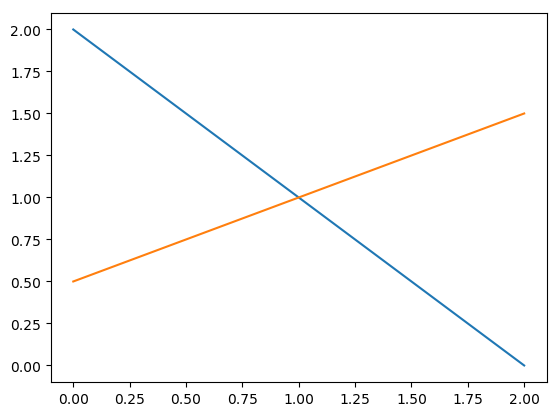

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fe935a4b190>

In [37]:
using PyPlot
x = linspace(0.0, 2.0, 100)
# Para obter as funções abaixo basta resolver as equações para y.
plot(x, 2 - x)
plot(x, (x + 1)/2)

Nessa imagem vemos claramento o ponto de cruzamento que é $(1, 1)$. A situação ficaria bem menos clara se as duas retas fossem quase paralelas. Isso ocorre por exemplo com o sistema
\begin{align*}
x + y &= 2 \\
(1.0 + 10^{-1})x + y &= 2 + 10^{-1}.
\end{align*}

Nesse caso a figura fica:

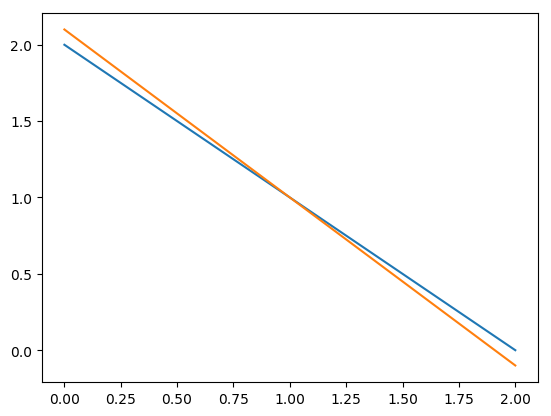

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fe91945f710>

In [38]:
plot(x, 2 - x)
plot(x, 2.1 - 1.1x)

Agora o ponto de intersecção continua sendo $(1, 1)$ mas isso é muito menos claro visualmente. A única solução é ir tentando aumentar a imagem próximo à região de intersecção (zoom) para tentar ver melhor. Por outro lado se você imaginar que as linhas tem espessura fixa o zoom não vai adiantar muito. Há uma precisão máxima que pode ser obtida. De forma análoga ao caso de linhas de espessura fixa, a precisão que pode ser atingida com números do tipo ponto flutuante é também limitada.

Dessa forma, é de se esperar que quando queremos resolver um sistema associado a equações quase paralelas o computador tenha problemas. Vamos ver isso.

In [49]:
# Constroi um sistema que tem solucao exata (1, 1) mas com a segunda 
# equacao muito parecida com a primeira.
pertubacao = 1.0e-8
A = [1.0 1.0; 1.0 + pertubacao 1.0 - pertubacao]
b = [2.0 2.0]
x = resolve_LU(A, b)
println("Solucao calculada = ", x[1], " ", x[2])
println("Erro relativo = ", norm(x - ones(2)))

Solucao calculada = 1.0000000055511151 0.9999999944488848
Erro relativo = 7.850462371923499e-9


Veja que a solução calculada já erra na nona casa. Isso é confirmado pelo calculo do erro relativo. Um fato interessante é que é possível calcular um valor a partir da matriz que nos diz quando esperar que problemas numéricos como os que vimos acima podem ocorrer. Mas para isso precisamos fazer um pequeno desvio e falar sobre normas de matrizes.

### Distâncias e normas de vetores e matrizes.

Em Matemática chamamos de norma, ou comprimento de um vetor $x \in \mathbb{R}^n$, uma função $x \mapsto \| x \| \in \mathbb{R}$ tal que:

1. $\| x \| \geq 0$ para todo $x \in \mathbb{R}^n$ e $\| x \| = 0$ somente se $x = 0$.

1. $\| \alpha x \| = |\alpha| \| x \|$, para todo $x \in \mathbb{R}^n$ e $\alpha \in \mathbb{R}$.

1. $\| x + y \| \leq \| x \| + \| y \|$ para todos $x, y \in \mathbb{R}^n$ (desigualdade triangular).

A ideia por detrás dessa definição é capturar diferentes formas de medir tamanho ou distância, mas preservando a propriedade que vetores pequenos tem tamanhos pequenos, somente o vetor nulo tem tamanho $0$ e que o tamanho do lado de um triângulo é menor ou igual a soma dos tamanhos dos outros dois lados.

Com a norma definida podemos definir a distância entre dois vetores como a norma de sua diferença, como é natural.

Vejamos agora alguns os exemplos mais importantes de norma nesse curso.

\begin{align*}
\| x \|_1 &= | x_1 | + | x_2 | + \ldots + | x_n |. \\
\| x \|_2 &= \sqrt{x_1^2 + x_2^2 + \ldots + x_n^2}. \\
\| x \|_\infty &= \max \{ | x_1 |, | x_2 |, \ldots, | x_n | \}.
\end{align*}

É fácil mostrar que as definições acima obedecem às três propriedades que definem uma norma usando as propriedades relacionadas da função módulo.

Uma pergunta natural é: porque se preocupar com formas alternativas de medir comprimento de vetor ou distância entre dois vetores que não seja a distância usual, euclidiana, que é capturada na definição da norma 2? Para entender disso imagine que você mora em uma cidade com ruas formando um quadriculado. Se você está em um ponto $(x_1, y_1)$ nessa cidade e quer ir para o ponto $(x_2, y_2)$ é fácil entender que o mínimo que você precisa se movimentar é justamente $| x_1 - x_ 2 |$ na horizontal $| y_1 - y_2 |$ na vertical. Ou seja, na prática a distância entre esses pontos é $| x_1 - x_ 2 | + | y_1 - y_2 |$ que está justamente relacionada à norma 1.

Da mesma forma que podemos estar interessados em definir o comprimento ou de vetores podemos também querer definir o comprimento ou tamanho de matrizes. Isso é usualmente feito referindo-se a normas de vetores. Vamos mais uma vez apresentar as definições mais importantes para o curso. Seja $A \in \mathbb{R}^{n \times n}$ temos
\begin{align*}
\| A \|_1 &= \max \{ \| a_{1:n, i} \|_1,\ i = 1, \ldots, n \} \quad\quad \text{(máxima norma 1 das colunas de A)}. \\
\| A \|_2 &= \max_{\| x \|_2 = 1} \{ \| Ax \|_2 \}.\\
\| A \|_\infty &= \max \{ \| a_{i, 1:n} \|_1,\ i = 1, \ldots, n \} \quad\quad \text{(máxima norma 1 das linhas de A)}. \\
\end{align*}

Uma propriedade fundamental que relaciona as normas de matrizes com as respectivas normas de vetores é apresentada a seguir.

**Proposição.** 
$$
\| Ax \|_\dagger \leq \| A \|_\dagger \| x \|_\dagger,
$$
em que $\dagger$  pode ser substituido (nas três posições ao mesmo tempo) por $1$, $2$, ou $\infty$.

Vejamos um exemplo numérico.

In [50]:
A = reshape(1:25, 5, 5)
@show norm(A, 1)
@show norm(A, 2)

@show norm(A, Inf);

norm(A,1) = 115.0
norm(A,2) = 74.2540539375446
norm(A,Inf) = 75.0


De posse dessas definições, estamos prontos para retomar o nosso objetivo original: apresentar um valor que pode ser calculado a partir da matriz associada ao sistema que desejamos resolver e que seja capaz de estimar a risco de corremos de ter grandes erros numéricos.

### Número de condição

Esse valor é conhecido como *número de condição* e pode ser entendido como uma forma de estimar o quanto a matriz está perto de ser não-inversível, ou seja o quão perto suas linhas (ou colunas) estão de se tornarem linearmente dependentes. Ele é dado por
$$
\kappa(A) = \| A \| \| A^{-1} \|.
$$

Vamos inicialmente calcular o número de condição das duas matrizes associados aos sistemas no plano vistos anteriormente:

In [51]:
A = [1 1; 1 -2]
norm(A)*norm(inv(A))

1.7675918792439989

In [52]:
A = [1.0 1.0; 1.0 + pertubacao 1.0 - pertubacao]
norm(A)*norm(inv(A))

2.0000000032571724e8

Como vocês podem ver o número de condição da segunda matriz é muito grande, da ordem de $10^8$. Isso sugere que é possível que encontremos dificuldades numéricos ao calcular a fatoração LU (mesmo usando pivoteamento) dessa matriz ou ao tentar resolver um sistema linear baseado nela, como já observamos.

### Continuando com número de condição (leitura opcional)

*Falta escrever*.

## Métodos iterativos

Os metodos que apresentamos acima, escalonamento (eliminação de Gauss) e fatoração LU, têm como característica a modificação do sistema original para colocá-lo em um formato que pode ser resolvido rapidamente. O grosso do trabalho, que é da ordem $O(\frac{2}{3} n^3)$, é gasto nesse processo de transformação do sistema ou da respectiva matriz. Até que ele seja terminado não se obtém nenhuma aproximação da solução. Esse tipo de método tem então uma característica do tipo "tudo ou nada". Ou o usuário espera que todo o trabalho seja feito ou ele sai sem nenhuma resposta. Esses métodos são conhecidos como métodos diretos.

Uma alternativa a esse tipo de método são os métodos iterativos. Nesse tipo de métodos o objetivo é aproximar, o mais rapidamente possível, a resposta. O que se perde é que em geral não é possível calculá-la exatamente. Esses métodos são usados quando, por exemplo, $n$ é muito grande e então não é possível esperar que um método direto termine o seu trabalho. Outra situação onde pode ser desejável usar métodos iterativos é quando a matriz $A$ possui muitos elementos nulos. Nesse caso dizemos que $A$ é uma matriz *esparsa*. Voltaremos a comentar isso depois.

Vamos apresentar agora as ideias por trás do método iterativo mais simples. Ele se baseia em uma observação trivial. Para fixar as ideias vamos iniciar com um sistema simples $2$ por $2$.
$$
\left\{ \begin{array}{rcrcl}
2.5x &-& y &=& 1.5 \\
x &-& 2y &=& -1.
\end{array}\right.
$$
Esse é um sistema simples com solução em $(1, 1)$. Veja o gráfico dele abaixo

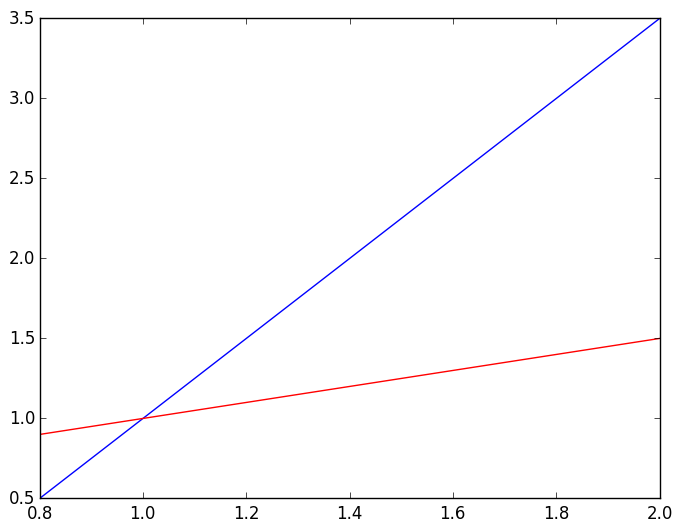

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f87849d4910>

In [2]:
using PyPlot

x = linspace(0.8, 2.0, 100)
eq1(x) = 2.5*x - 1.5
eq2(x) = 0.5*(1.0 + x)
plot(x, eq1(x), color="blue")
plot(x, eq2(x), color="red")

Uma outra forma de encarar as equações do sistema é vê-las como fórmulas de como calcular uma das variáveis das soluções se conhecêssemos a outra. Isso fica claro se reorganizarmos um pouco as duas equações.
\begin{align*}
x &= (1.5 + y)/2.5 \\
y &= (1 + x)/2.
\end{align*}
A ideia do método de Jacobi é melhorar uma aproximação da solução que obtivemos até o momento $k$, que vamos denotar por $(x^k, y^k)$, usando essas duas equações como se elas estivessem partindo da solução exata. Isto é fazer
\begin{align*}
x^{k+1} &= (1.5 + y^k)/2.5 \\
y^{k+1} &= (1 + x^k)/2.
\end{align*}

Geometricamente a primeira equação faz é encontrar a coordenada $x$ do ponto na reta azul que tem coordenada $y = y^k$, ou seja a intersecção da reta azul com uma reta paralela ao eixo x que passar por $(x^k, y^k)$. Já a segunda equação busca a coordenada $y$ do ponto na reta vermelha que cruza com uma reta vertical que passa também por $(x^k, y^k)$.

Para entender isso melhor, imagine que temos $(x^k, y^k) = (1.4, 1.3)$. O código abaixo representa as contas feitas a apresenta o novo ponto calculado bem como o ponto de partida. Note que o novo ponto se aproxima da solução que é a intersecção das retas.

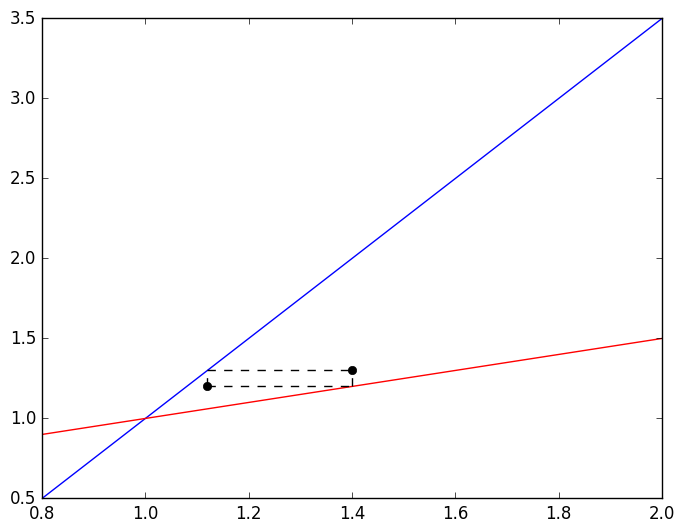

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f95b4f7ffd0>

In [51]:
# Passo de Jacobi
# Apresenta o grafico inicial
plot(x, eq1(x), color="blue")
plot(x, eq2(x), color="red")

# Apresenta o ponto de partida e as linhas que geram o novo ponto
xk, yk = 1.4, 1.3
unsx = ones(length(x))
y = 0.5:0.01:3.0
unsy = ones(length(y))
plot(xk, yk, marker="o", color="black")

# Calcula o novo ponto e o apresenta
xk1 = (1.5+ yk)/2.5
yk1 = (1.0 + xk)/2
deltax = xk1:0.01:xk
deltay = yk1:0.01:yk
plot(deltax, yk*ones(length(deltax)), color="black", linestyle="--")
plot(xk*ones(length(deltay)), deltay, color="black", linestyle="--")
plot(xk1, yk1, marker="o", color="black")
plot(deltax, yk1*ones(length(deltax)), color="black", linestyle="--")
plot(xk1*ones(length(deltay)), deltay, color="black", linestyle="--")

Podemos ainda continuar fazendo isso, gerando então uma sequencia e ver se ela se aproxima ou não da solução:


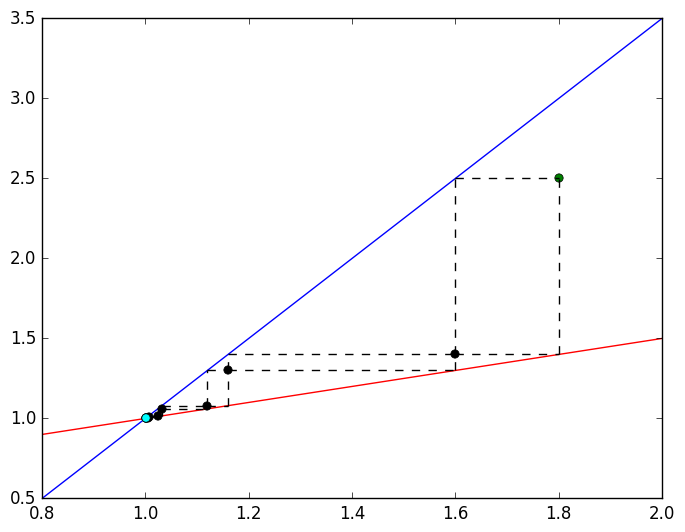

Ponto final calculado (1.0002559999999998, 1.00048)


In [6]:
# Método de Jacobi
# Altere esses parametros para ver o novo comportamento.
# Ponto incial
xk, yk = 1.8, 2.5
# Numero de iteracoes
maxiter = 10

# Apresenta o grafico inicial
plot(x, eq1(x), color="blue")
plot(x, eq2(x), color="red")

# Apresenta o ponto de partida em verde e as linhas que geram o novo ponto
unsx = ones(length(x))
y = 0.5:0.01:3.0
unsy = ones(length(y))
plot(xk, yk, marker="o", color="green")

# Calcula os novos pontos e os apresenta
for i = 1:maxiter
    xk1 = (1.5 + yk)/2.5
    yk1 = (1.0 + xk)/2.0
    deltax = xk1:0.01:xk
    deltay = yk1:0.01:yk
    plot(deltax, yk*ones(length(deltax)), color="black", linestyle="--")
    plot(xk*ones(length(deltay)), deltay, color="black", linestyle="--")
    plot(xk1, yk1, marker="o", color="black")
    plot(deltax, yk1*ones(length(deltax)), color="black", linestyle="--")
    plot(xk1*ones(length(deltay)), deltay, color="black", linestyle="--")
    xk, yk = xk1, yk1
end
# Apresenta o ponto final em cyan
plot(xk, yk, marker="o", color="cyan")
show()
println("Ponto final calculado (", xk,", ", yk, ")")

É interessante brincar um pouco com o código acima variando o número de passos dados e o ponto de partida. Note também que o último ponto computado é impresso logo após o gráfico. Verifique como ele muda quando você muda os parâmetros sugeridos.

Vimos então que a ideia simples de Jacobi pode funcionar, pelo menos em alguns casos. Uma pergunta natural é se é possível identificar de antemão se o método funcionará ou não. Isso será o tema da subseção Análise de Convergência abaixo. Por enquanto vamos fazer mais um experimento.

O que ocorreria se o sistema tivesse as duas equações trocadas? Ou seja se ele fosse
$$
\left\{ \begin{array}{rcrcl}
x &-& 2y &=& -1 \\
2.5x &-& y &=& 1.5. 
\end{array}\right.
$$
Nesse caso as fórmulas de atualização seriam
\begin{align*}
x^{k+1} &= -1 + 2y^k \\
y^{k+1} &= 2.5x - 1.5.
\end{align*}

Podemos copiar a implementação do método acima com as devidas modificações para ver o que ocorre. Vamos agora marcar o ponto inicial na cor magenta para destacar um fenômeno interessante. Observe também que o ponto inicial está bem mais perto da solução. Ele é $(0.01, 0.01)$.

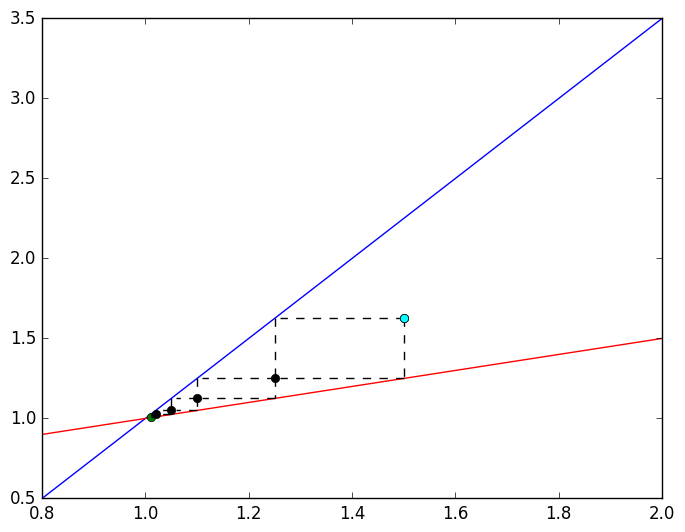

Ponto final calculado (1.4999999999999982, 1.6249999999999978 )


In [71]:
# Método de Jacobi
# Altere esses parametros para ver o novo comportamento.
# Ponto incial
xk, yk = 1.01, 1.01
# Numero de iteracoes
maxiter = 5

# Apresenta o grafico inicial
plot(x, eq1(x), color="blue")
plot(x, eq2(x), color="red")

# Apresenta o ponto de partida e as linhas que geram o novo ponto
unsx = ones(length(x))
y = 0.5:0.01:3.0
unsy = ones(length(y))
plot(xk, yk, marker="o", color="green")

# Calcula os novo ponto e o apresenta
for i = 1:maxiter
    xk1 = -1.0 + 2.0*yk
    yk1 = 2.5*xk - 1.5
    deltax = xk1:-0.01:xk
    deltay = yk1:-0.01:yk
    plot(deltax, yk*ones(length(deltax)), color="black", linestyle="--")
    plot(xk*ones(length(deltay)), deltay, color="black", linestyle="--")
    plot(xk1, yk1, marker="o", color="black")
    plot(deltax, yk1*ones(length(deltax)), color="black", linestyle="--")
    plot(xk1*ones(length(deltay)), deltay, color="black", linestyle="--")
    xk, yk = xk1, yk1
end
# Ponto final
plot(xk, yk, marker="o", color="cyan")
show()
println("Ponto final calculado (", xk,", ", yk," )")

O que observamos acima é um pouco surpreendente. A sequencia gerada pelo Método de Jacobi agora se afasta da solução. Isso ocorreu devido a simples troca da ordem das equações, o que mostra que o método é bastante sensível. Vamos entender isso melhor na seção sobre convergência abaixo. Ainda, destacamos que apesar de o método ter sido apresentado para o caso de duas equações e duas variáveis, a sua extensão para o caso com $n$ equações e variáveis é direta. Basta isolar a variável $i$ usando a linha $i$ e obtemos a fórmula geral.
\begin{equation}
x^{k+1}_i = \frac{b_i - \sum_{j = 1}^{i - 1} a_{ij} x^k_j - \sum_{j = i + 1}^{n} a_{ij} x^k_j}{a_{ii}},\ i = 1, \ldots, n.
\end{equation}

Agora, vamos introduzir outro método que é uma pequena variação que melhora o método de Jacobi. Para isso vamos escrever as fórmulas genéricas de Jacobi para um sistema de 3 variáveis e 3 equações com matriz associada $A = (a_{ij})$.
\begin{align*}
x^{k+1}_1 &= \frac{b_1 - a_{12} x^k_2 - a_{13}x^k_3}{a_{11}} \\
x^{k+1}_2 &= \frac{b_2 - a_{21} x^k_1 - a_{23}x^k_3}{a_{22}} \\
x^{k+1}_3 &= \frac{b_3 - a_{31} x^k_1 - a_{32}x^k_2}{a_{33}}.
\end{align*}
Observe que no momento que vamos calcular $x^{k+1}_3$ já temos as novas aproximações das duas primeiras coordenadas $x^{k + 1}_1$ e $x^{k + 1}_2$. Se o método estiver indo bem, temos a expectativas que essas aproximações sejam melhores que os valores de $x^k$. Então por que não aproveitá-los? Essa é a ideia do método de Gauss-Seidel. Nele as novas coordenadas já computadas são aproveitadas no cômputo da próxima coordenada. No caso de 3 variáveis teríamos:
\begin{align*}
x^{k+1}_1 &= \frac{b_1 - a_{12} x^k_2 - a_{13}x^k_3}{a_{11}} \\
x^{k+1}_2 &= \frac{b_2 - a_{21} x^{k+1}_1 - a_{23}x^k_3}{a_{22}} \\
x^{k+1}_3 &= \frac{b_3 - a_{31} x^{k+1}_1 - a_{32}x^{k+1}_2}{a_{33}}.
\end{align*}
Podemos também apresentar a versão geral do método de Gauss-Seidel, adaptando a fórmula geral do método de Jacobi acima.
\begin{equation}
x^{k+1}_i = \frac{b_i - \sum_{j = 1}^{i - 1} a_{ij} x^{k+1}_j - \sum_{j = i + 1}^{n} a_{ij} x^k_j}{a_{ii}},\ i = 1, \ldots, n.
\end{equation}

Abaixo modificamos a implementação anterior do método de Jacobi para o sistema do início desta seção de modo usar a ideia de Gauss-Seidel. Note que a aproximação da solução obtida após um número fixo de iterações é melhor do que o método de Jacobi. Isso ocorre devido ao uso de informação mais recente à medida que as coordenadas são calculadas.

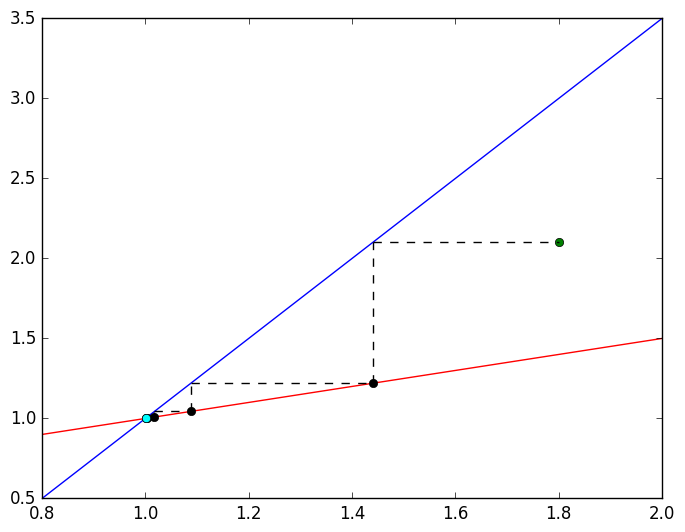

Ponto final calculado (1.000704, 1.000352 )


In [72]:
# Método de Gauss-Seidel
# Altere esses parametros para ver o novo comportamento.
# Ponto incial
xk, yk = 1.8, 2.1
# Numero de iteracoes
maxiter = 5

# Apresenta o grafico inicial
plot(x, eq1(x), color="blue")
plot(x, eq2(x), color="red")

# Apresenta o ponto de partida e as linhas que geram o novo ponto
unsx = ones(length(x))
y = 0.5:0.01:3.0
unsy = ones(length(y))
plot(xk, yk, marker="o", color="green")

# Calcula os novo ponto e o apresenta
for i = 1:maxiter
    xk1 = (1.5 + yk)/2.5
    yk1 = (1.0 + xk1)/2.0
    deltax = xk1:0.01:xk
    deltay = yk1:0.01:yk
    plot(deltax, yk*ones(length(deltax)), color="black", linestyle="--")
    plot(xk1, yk1, marker="o", color="black")
    plot(xk1*ones(length(deltay)), deltay, color="black", linestyle="--")
    xk, yk = xk1, yk1
end
plot(xk, yk, marker="o", color="cyan")
show()
println("Ponto final calculado (", xk,", ", yk," )")

Porém o método sofre de problemas semelhantes ao de Jacobi. Uma simples troca da ordem das equações faz com que o método se afaste da solução ao invés de se aproximar. Vamos agora começar a estudar quando podemos garantir que um método converge à solução do problema.

## Convergência

Nessa seção vamos supor que a matriz do sistema
$$
Ax = b
$$
é inversível. Isso garante que o sistema tem solução única que vamos denotar por $x^*$. 

Como vimos os métodos de Jacobi e Gauss-Seidel não tentam calcular uma solução diretamente. Eles tentam melhorar uma aproximação da solução cada vez mais, gerando uma sequencia $x^1, x^2, x^2, \ldots$. Quando podemos dizer que a solução obtida é suficiente boa? Quando podemos dizer que um método desses funciona?

**Definição.** Seja $x^1, x^2, x^2, \ldots$, uma sequência gerada por um método iterativo. Dizemos que o método *converge* se existe $x^*$ solução do problema de interesse tal que a sequencia calculada $\{ x^k \}$ converge para $x^*$. Ou seja se a distância entre $x^k$ e $x^*$ converge para 0 (zero).

Nosso objetivo agora é apresentar condições que possam garantir que os métodos iterativos que estudamos convergem à solução $x^*$ do sistema $Ax = b$. Para isso vamos começar observando que uma forma interessante de se ver um método iterativo é como uma função que é calculada em uma aproximação $x$ do ponto desejado resultando em uma nova aproximação $x^+$ que é potencialmente melhor. Ou seja, podemos imaginar que um algoritmo pode muitas vezes ser descrito por uma função $\phi: \mathbb{R}^n \rightarrow \mathbb{R}^n$ e a regra
$$
x^{k + 1} = \phi(x^k).
$$
Caso tal função de iteração $\phi$ exista, é natural que ela tenha a propriedade de que se o ponto de partida já é a solução $x^*$ então a $\phi$ diga que "se deve ficar parado" para não perder a solução. Isto é
$$
x^* = \phi(x^*).
$$
Além disso, também é natural pedir que se o ponto não for uma solução então $\phi$ devolva um ponto diferente, se não o respectivo método iterativo poderia ficar parado em cima de pontos que não são soluções. Isso em linguagem matemática é o mesmo que dizer que $\phi$ deve ter como único ponto fixo justamente a solução do problema de interesse.

Retomando o problema de sistemas lineares, vamos tentar re-escrever os métodos de Jacobi e Gauss-Seidel descobrindo a expressão da função $\phi$. Para isso é útil quebrar a matriz $A$ do sistema que desejamos resolver
$$
A x = b
$$
em três submatrizes. Vamos escrever $A = L + D + U$, em que $L$ contém os elementos abaixo da diagonal de $A$ (e tem zero na diagonal e acima dela), $D$ contém a diagonal de $A$ (e zero fora da diagonal) e $U$ possui os elementos que ficam acima da diagonal.

Retomando a formula do Jacobi.
\begin{equation*}
x^{k+1}_i = \frac{b_i - \sum_{j = 1}^{i - 1} a_{ij} x^k_j - \sum_{j = i + 1}^{n} a_{ij} x^k_j}{a_{ii}},\ i = 1, \ldots, n,
\end{equation*}
podemos escrevê-la de forma mais compacta como
$$
x^{k + 1} = D^{-1}(b - Lx^k - U x^k).
$$
Reorganizando os termos temos
$$
x^{k + 1} = -D^{-1}(L + U)x^k + D^{-1}b.
$$
Isso sugere a função de iteração
$$
\phi_J(x) = -D^{-1}(L + U)x + D^{-1}b.
$$
No caso do método de Gauss-Seidel a situação é semelhante, porém um pouco mais interessante.
\begin{gather}
x^{k + 1} = D^{-1}(b - Lx^{k+1} - U x^k) \iff \\
D x^{k + 1} = b - Lx^{k+1} - U x^k \iff \\
D x^{k + 1} + L x^{k + 1} = -Ux^k + b \iff \\
(D + L) x^{k + 1} = -Ux^k + b \iff \\
x^{k + 1} = -(D + L)^{-1}Ux^k + (D + L)^{-1}b.
\end{gather}
Nesse caso a função de iteração é 
$$
\phi_{GS}(x) = -(D + L)^{-1}Ux + (D + L)^{-1}b.
$$

Nos dois casos vemos que a função de iteração pode ser escrita como 
$$
\phi(x) = Bx + c,
$$ 
em que $B$ é uma matriz e c um vetor constante. Também nos dois casos como $x^*$ é tal que $A x^* = b$ temos $\phi(x^*) = x^*$, como gostaríamos. Vamos ver isso no caso de Gauss-Seidel
\begin{align*}
\phi_{GS}(x^*) &= -(D + L)^{-1}Ux^* + (D + L)^{-1}b \\
               &= -(A - U)^{-1}Ux^* + (A - U)^{-1}b \\
               &= -(A - U)^{-1}Ux^* + (A - U)^{-1} A x^* \\
               &= (A - U)^{-1}(-U + A)x^* \\
               &= x^*.
\end{align*}
A pergunta sobre a convergência dos métodos pode então ser repensada da seguinte forma. Se $\phi(x)$ tem a forma $Bx + c$, quando podemos garantir que o $\| x^k - x^* \|$ converge para $0$? Para isso façamos algumas manipulações simples
\begin{align*}
\| x^{k + 1} - x^* \|_\dagger &= \| \phi(x^k) - x^* \|_\dagger \\
                              &= \| \phi(x^k) - \phi(x^*) \|_\dagger \\
                              &= \| Bx^k + c - Bx^* - c \|_\dagger \\
                              &= \| B(x^k - x^*) \|_\dagger \\
                              &\leq \| B \|_\dagger \| x^k - x^* \|_\dagger.
\end{align*}
Na última passagem usamos a propriedade que relaciona a norma de matrizes com a respectiva norma de vetores.

Aplicando isso recursivamente vemos que 
$$
\| x^{k + 1} - x^* \|_\dagger \leq  \| B \|_\dagger^k \| x^1 - x^* \|_\dagger.
$$
Note que isso garante que $\| x^{k + 1} - x^* \|_\dagger \rightarrow 0$ sempre que $\| B \|_\dagger < 1$. Podemos imediatamente enunciar o seguinte resultado:

**Teorema.** Considere que o sistema Um método iterativo descrito por uma função $\phi$ que tenha as soluções de $Ax = b$ como único ponto fixo. Se $\phi$ é descrita por $\phi(x) = Bx + c$ então o método converge sempre que $\| B \|_\dagger < 1$ para alguma das normas consideradas.

Obs: Note que acima não escrevemos "converge na norma $\| \cdot \|_\dagger$" mas simplesmente usamos "converge". Isso porque é fácil de provar, pelo menos paras as normas vistas nessa seção que se $\| x^k - x^* \|_\dagger \rightarrow 0$ para alguma das normas o mesmo ocorre para as outras. Isso ocorre porque é possível achar para cada par de normas uma constante, que geralmente depende da dimensão do espaço, tal que uma norma é menor do que essa constante vezes a outra.

O que esse teorema nos ensina sobre os métodos de Jacobi e Gauss-Seidel? Por exemplo, no caso do método de Jacobi, em que a matriz $B = -D^{-1}(L + U)$ podemos ver que

**Teorema.** A matriz associada ao método de Jacobi $B = -D^{-1}(L + U)$ tem norma infinito menor estrita que $1$ se 
$$
| a_{ii} | > \sum_{j = 1, j \neq i}^n | a_{ij} |.
$$
**Prova.** Lembremos que a norma infinito de uma matriz é a máxima norma 1 de suas linhas. Mas os elementos da linha $i$ de $B$ são exatamente 
$$
b_{ij} = \frac{a_{ij}}{a_{ii}},\ j = 1, \ldots, n.
$$
Assim, a norma 1 da linha $i$ de b é igual a
$$
\sum_{j = 1}^n \left| \frac{a_{ij}}{a_{ii}} \right| < 1.
$$
A última desigualdade segue imediatamente da hipótese do teorema. Ou seja, todas as linhas de $B$ tem norma $1$ menor que $1$ e portanto $\| B \|_\infty < 1$. $\blacksquare$

Obs: Uma matriz cujos elementos da diagonal sejam em módulo maior do que as somas dos módulos dos outros elementos da mesma linha é chamada de *matriz diagonal dominante por linhas*. O que o teorema diz é que o método de Jacobi converge se a matriz do sistema for diagonal dominante por linhas. Observe que esse resultado ajuda a entender porque a ordem das equações, que estão relacionadas às linhas da matriz, é importante para a convergência. Se a linha escolhilda para isolar o termo $x_i$ tiver a constante que multiplica essa variável muito pequena em módulo o método pode não convergir. Isso é exatamente o que ocorre quando trocamos as ordem das duas equações no sistema usando como exemplo anteriormente.

Acabamos essa seção com dois comentários e com um exemplo de implementação do método de Jacobi.

1. Pode-se mostrar que o critério de dominância por linhas também é válido para Gauss-Seidel.

1. O método de Gauss-Seidel é tipicamente mais rápido do que o de Jacobi. Porém ele estabelece uma ordem na qual as variáveis devem ser atualizadas e por isso é de paralelização mais difícil. Nesse sentido há problemas em que Jacobi ainda pode ganhar, se o ganho com seu palelismo inerente foi maior do que o ganho obtido por Gauss-Seidel por aproveitar os valores das vairáveis já atualizadas. Isso tem se tornado mais importante nos últimos anos em que o ganho de poder computacional tem vindo mais do aumento do número de processadores do que no aumento de velocidade de cada unidade de processamento.

In [74]:
# Implementacao inocente do método de Jacobi
function jacobi(A, b, maxiters=100, prec=1.0e-5)
    # Pega a dimensão do problema
    n = length(b)
    
    # Constroi as matrizes de interação
    Dinv = 1.0 ./ diag(A)
    LpU = copy(A)
    for i = 1:n
        LpU[i, i] = 0.0
    end
    
    # Inicialização
    iters = 0
    c = Dinv .* b
    x = copy(c)
    
    # Iterações de Jacobi
    @printf "Iter %d, Resíduo = %.2e\n" iters norm(A*x - b)
    while iters < maxiters && norm(A*x - b) > prec
        x = -Dinv .* (LpU*x) + c
        iters += 1
        @printf "Iter %d, Resíduo = %.2e\n" iters norm(A*x - b)
    end
    return x
end


# Dimensão do problema de teste.
n = 1000
# Pega matriz e lado direitos aleatórios
A = rand(n, n)
b = rand(n)
# Faz a matriz ficar diagonal dominante
for i = 1:n
    A[i, i] += 1001.0
end

# Testa o método
x = jacobi(A, b)
@show norm(A*x - b);

Iter 0, Resíduo = 7.69e+00
Iter 1, Resíduo = 3.83e+00
Iter 2, Resíduo = 1.91e+00
Iter 3, Resíduo = 9.53e-01
Iter 4, Resíduo = 4.75e-01
Iter 5, Resíduo = 2.37e-01
Iter 6, Resíduo = 1.18e-01
Iter 7, Resíduo = 5.88e-02
Iter 8, Resíduo = 2.93e-02
Iter 9, Resíduo = 1.46e-02
Iter 10, Resíduo = 7.29e-03
Iter 11, Resíduo = 3.63e-03
Iter 12, Resíduo = 1.81e-03
Iter 13, Resíduo = 9.03e-04
Iter 14, Resíduo = 4.50e-04
Iter 15, Resíduo = 2.24e-04
Iter 16, Resíduo = 1.12e-04
Iter 17, Resíduo = 5.58e-05
Iter 18, Resíduo = 2.78e-05
Iter 19, Resíduo = 1.39e-05
Iter 20, Resíduo = 6.91e-06
norm(A * x - b) = 6.909969829599249e-6
